# Machine Learning topological phases in real space: Nearest-neighbours SSH model 6561_90 periodic boundary conditions.

In this notebook we produce the results of the machine learning analysis of topological phase transitions occurring  in nearest-neighbours SSH models as decribed in the paper [Machine learning topological phases in real space](https://arxiv.org/abs/1901.01963).

## Running models with SSH data

In [1]:
%%time
%load_ext autoreload
%autoreload 2
from simulation import *

CPU times: user 390 ms, sys: 43.8 ms, total: 434 ms
Wall time: 435 ms


In [2]:
%%time
### YOU MAY NEED TO CHANGE THE CSV FILENAME!
csv_path = "/home/rio/data/phase_transitions/csv/first_neighbours_periodic_6561_90.csv"             
model = DecisionTreeClassifier(criterion="entropy")
########## YOU MAY NEED TO CHANGE THE ALLOWED WINDINGS!
allowed_windings = [0,1]
########## YOU MAY NEED TO CHANGE THE SIMULATION DIR!
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_periodic_6561_90"
########## YOU MAY NEED TO CHANGE VALIDATION SPLIT!
val_split = 0.9  
########## YOU MAY NEED TO CHANGE WHICH FEATURES TO USE
features_to_use = None 
########## YOU MAY NEED TO SHUFFLE FEATURES
shuffle_features = False
########## YOU MAY NEED TO CHANGE THE SEED!
random_state = 137                    
########## YOU MAY NEED TO CHANGE THE SIMULATION PATH!
dict_args = {"csv_path": csv_path, "model": model, "allowed_windings": allowed_windings,\
             "simulation_dir": simulation_dir, "val_split": val_split, "features_to_use": features_to_use,\
             "shuffle_features": shuffle_features, "random_state": random_state}

#Starting an instance of Simulation with a decision tree
simulation = Simulation(**dict_args)
#

print("Info on all data: \n")
simulation.dataframe.info()
simulation.dataframe.head()

/home/rio/anaconda3/envs/phase_transitions/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Info on all data: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1180980 entries, 0 to 1180979
Columns: 188 entries, id to feat179
dtypes: float64(183), int32(3), object(2)
memory usage: 1.6+ GB
CPU times: user 22.3 s, sys: 1.58 s, total: 23.9 s
Wall time: 22.6 s


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat170,feat171,feat172,feat173,feat174,feat175,feat176,feat177,feat178,feat179
0,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.074536,0.074536,...,0.074536,0.074536,0.074536,0.074536,0.074536,0.074536,0.074536,0.074536,0.074536,0.074536
1,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.105409,0.105345,...,0.099052,0.097734,0.101326,0.100250,0.103106,0.102278,0.104383,0.103808,0.105152,0.104832
2,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.105409,0.105152,...,0.080748,0.075825,0.089392,0.085278,0.096296,0.093071,0.101326,0.099052,0.104383,0.103106
3,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,-0.074536,0.074536,...,-0.074536,0.074536,-0.074536,0.074536,-0.074536,0.074536,-0.074536,0.074536,-0.074536,0.074536
4,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.000030,-0.003649,...,-0.036024,-0.039459,-0.029026,-0.032545,-0.021886,-0.025472,-0.014640,-0.018274,-0.007323,-0.010988


#### Checking initialization

In [3]:
%%time
n_features = simulation.n_features
n_hamiltonians = simulation.n_hamiltonians
n_ts = simulation.n_ts

print("n_features: ", n_features)
print("n_hamiltonians: ", n_hamiltonians)
print("n_ts: ", n_ts)

n_features:  180
n_hamiltonians:  6561
n_ts:  2
CPU times: user 1.27 ms, sys: 91 µs, total: 1.36 ms
Wall time: 1.15 ms


In [4]:
%%time
n_total = len(simulation.dataframe)
n_train = len(simulation.dataframe[simulation.dataframe.type_of == "train"])
n_val = len(simulation.dataframe[simulation.dataframe.type_of == "val"])
n_test = len(simulation.dataframe[simulation.dataframe.type_of == "test"])
n_train_hamiltonians = len(simulation.train_ids)
n_val_hamiltonians = len(simulation.val_ids)
n_test_hamiltonians = len(simulation.test_ids)
n_total_hamiltonians = n_train_hamiltonians + n_val_hamiltonians + n_test_hamiltonians

print("% train: ", n_train/n_total)
print("% val: ",  n_val/n_total)
print("% test: ", n_test/n_total)
print("% train + val + test: ", (n_train+n_val+n_test)/n_total)
print("\n")
print("number of train hamiltonians: ", n_train_hamiltonians)
print("number of val hamiltonians: ", n_val_hamiltonians)
print("number of test hamiltonians: ", n_test_hamiltonians)
print("total number of hamiltonians: ", n_total_hamiltonians)
print("\n")
print("train ids: ", simulation.train_ids)
print("val ids: ", simulation.val_ids)
print("test ids: ", simulation.test_ids)

% train:  0.8306660570035056
% val:  0.0
% test:  0.16933394299649443
% train + val + test:  1.0


number of train hamiltonians:  5450
number of val hamiltonians:  0
number of test hamiltonians:  1111
total number of hamiltonians:  6561


train ids:  [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 161, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202,

## Running a simulation

In [5]:
%%time
#running a simulation
n_experiments = 100
start_n = 0
fit_params = None
pred_params = None
random_features = False
######### DON'T SET THIS TO TRUE UNLESS YOUR DATASET IS SMALL!! WILL FLOOD YOUR MEMORY!!!
store_in_lists = False   
########## BELOW ARE THE PARAMETERS THAT CONTROL WHAT WILL BE SAVED
save_eigenvector=True
save_hamiltonian=True 
save_accuracy=True 
save_model=True
########## RUNNING SIMULATION
simulation.run_simulation(n_experiments = n_experiments, start_n = start_n, fit_params = fit_params, \
                          pred_params=pred_params, random_features = random_features, \
                          store_in_lists=store_in_lists, save_eigenvector=save_eigenvector, \
                          save_hamiltonian=save_hamiltonian, save_accuracy=save_accuracy, save_model=save_model)

simulation.dataframe.head(10)

running experiments: 100%|██████████| 100/100 [49:21<00:00, 28.50s/it]

CPU times: user 52min 41s, sys: 43.8 s, total: 53min 25s
Wall time: 49min 21s


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat170,feat171,feat172,feat173,feat174,feat175,feat176,feat177,feat178,feat179
0,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,0.074536,0.074536,...,0.074536,0.074536,0.074536,0.074536,0.074536,0.074536,0.074536,0.074536,0.074536,0.074536
1,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,0.105409,0.105345,...,0.099052,0.097734,0.101326,0.100250,0.103106,0.102278,0.104383,0.103808,0.105152,0.104832
2,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,0.105409,0.105152,...,0.080748,0.075825,0.089392,0.085278,0.096296,0.093071,0.101326,0.099052,0.104383,0.103106
3,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,-0.074536,0.074536,...,-0.074536,0.074536,-0.074536,0.074536,-0.074536,0.074536,-0.074536,0.074536,-0.074536,0.074536
4,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,0.000030,-0.003649,...,-0.036024,-0.039459,-0.029026,-0.032545,-0.021886,-0.025472,-0.014640,-0.018274,-0.007323,-0.010988
5,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,-0.000365,0.006989,...,0.067476,0.072960,0.055548,0.061662,0.042540,0.049164,0.028703,0.035709,0.014308,0.021558
6,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,-0.105377,-0.104528,...,-0.050435,-0.040484,-0.068577,-0.059834,-0.083723,-0.076569,-0.095209,-0.089958,-0.102533,-0.099416
7,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,-0.002187,-0.013191,...,-0.092361,-0.097165,-0.079781,-0.086545,-0.063714,-0.072143,-0.044863,-0.054587,-0.024050,-0.034646
8,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,0.105391,0.104094,...,0.016379,0.001727,0.044446,0.030711,0.069070,0.057316,0.088342,0.079480,0.100770,0.095486
9,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,0.000845,0.015506,...,0.103951,0.105371,0.095109,0.100508,0.078897,0.087858,0.056573,0.068401,0.029866,0.043644


#### Viewing a random sample

In [6]:
%%time
simulation.dataframe.sample(frac=0.1, replace=False)

CPU times: user 203 ms, sys: 41 µs, total: 203 ms
Wall time: 202 ms


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat170,feat171,feat172,feat173,feat174,feat175,feat176,feat177,feat178,feat179
431345,2396,H_-0.55_0.35_0.000421786.dat,-0.55,0.35,0.000422,0,0,val,0.000019,-0.038242,...,0.103804,-0.090095,-0.073237,0.095744,-0.021897,-0.016983,0.097726,-0.076749,-0.087399,0.102819
812811,4515,H_0.75_1_1.00434.dat,0.75,1.00,1.004338,1,1,test,0.001088,-0.092872,...,-0.037073,0.070218,-0.086775,-0.093268,0.079058,-0.025091,0.048523,0.105408,-0.102536,-0.025910
277239,1540,H_-1.05_-1.95_1.00235.dat,-1.05,-1.95,1.002350,1,1,val,0.105404,-0.101203,...,-0.053645,0.076132,-0.012101,0.039897,0.031536,-0.003236,0.069719,-0.045810,0.095848,-0.080463
405338,2251,H_-0.65_1.2_1.0007.dat,-0.65,1.20,1.000704,1,1,train,-0.000376,-0.104912,...,-0.103742,0.028292,-0.049154,0.097434,0.043217,0.091681,0.102369,0.015455,0.082831,-0.072651
793821,4410,H_0.7_-0.2_0.000241021.dat,0.70,-0.20,0.000241,0,0,val,-0.105404,-0.104389,...,-0.099418,-0.093089,0.098676,0.103098,-0.051762,-0.064865,-0.019372,-0.003718,0.081442,0.070562
972332,5401,H_1.3_0.75_-0.001479.dat,1.30,0.75,-0.001479,0,0,val,0.003308,-0.053816,...,0.070257,-0.099486,-0.098925,0.104196,0.104434,-0.084514,-0.085495,0.045047,0.046541,0.004966
23977,133,H_-1.95_0.6_0.000255198.dat,-1.95,0.60,0.000255,0,0,val,0.000127,0.010122,...,0.091350,-0.085804,-0.104845,0.103289,0.100211,-0.102915,-0.078249,0.084746,0.042758,-0.051923
68649,381,H_-1.8_0.85_0.000347888.dat,-1.80,0.85,0.000348,0,0,val,0.105409,0.098709,...,-0.099136,-0.105405,0.003923,0.040405,0.096197,0.075133,-0.075994,-0.096695,-0.039261,-0.002687
108100,600,H_-1.65_-0.35_-0.000292006.dat,-1.65,-0.35,-0.000292,0,0,val,0.105408,0.105399,...,-0.098870,-0.099539,0.101179,0.101716,-0.102995,-0.103397,0.104308,0.104575,-0.105114,-0.105244
516577,2869,H_-0.25_-0.3_1.00651.dat,-0.25,-0.30,1.006508,1,0,test,0.105408,0.016610,...,0.081046,0.079633,-0.105119,-0.009308,0.070186,-0.066241,0.004144,0.104609,-0.076148,-0.084257


#### Checking train/val/test splits again

In [7]:
%%time
n_total = len(simulation.dataframe)
n_train = len(simulation.dataframe[simulation.dataframe.type_of == "train"])
n_val = len(simulation.dataframe[simulation.dataframe.type_of == "val"])
n_test = len(simulation.dataframe[simulation.dataframe.type_of == "test"])
n_train_hamiltonians = len(simulation.train_ids)
n_val_hamiltonians = len(simulation.val_ids)
n_test_hamiltonians = len(simulation.test_ids)
n_total_hamiltonians = n_train_hamiltonians + n_val_hamiltonians + n_test_hamiltonians

print("% train: ", n_train/n_total)
print("% val: ",  n_val/n_total)
print("% test: ", n_test/n_total)
print("% train + val + test: ", (n_train+n_val+n_test)/n_total)
print("\n")
print("number of train hamiltonians: ", n_train_hamiltonians)
print("number of val hamiltonians: ", n_val_hamiltonians)
print("number of test hamiltonians: ", n_test_hamiltonians)
print("total number of hamiltonians: ", n_total_hamiltonians)
print("\n")
print("train ids: ", simulation.train_ids)
print("val ids: ", simulation.val_ids)
print("test ids: ", simulation.test_ids)

% train:  0.08306660570035056
% val:  0.747599451303155
% test:  0.16933394299649443
% train + val + test:  1.0


number of train hamiltonians:  545
number of val hamiltonians:  4905
number of test hamiltonians:  1111
total number of hamiltonians:  6561


train ids:  [2244, 5598, 2661, 4558, 665, 1326, 3471, 1851, 3143, 683, 5204, 5638, 1215, 3375, 2247, 1847, 6433, 2493, 3434, 3988, 2105, 5365, 3017, 4520, 749, 2842, 56, 2116, 4832, 3821, 345, 1591, 669, 3060, 113, 4161, 2766, 4045, 4392, 1609, 1769, 2366, 5720, 3276, 1926, 6425, 3581, 1622, 1127, 1892, 4009, 5508, 6401, 2166, 4852, 1490, 104, 6044, 2545, 1830, 16, 3357, 4939, 4038, 2576, 1509, 2004, 607, 3199, 1709, 3974, 2678, 4212, 6490, 1697, 963, 4865, 6268, 6410, 4857, 3027, 1255, 1420, 5308, 2942, 1367, 4690, 3549, 5929, 5295, 778, 5856, 2063, 5957, 1261, 753, 2799, 4797, 2352, 2257, 2405, 3255, 1047, 1974, 4783, 3419, 6382, 4003, 2316, 4168, 204, 5372, 3894, 1611, 1194, 3439, 5617, 5776, 3649, 3825, 393, 5298, 5069, 4948, 4580

#### Checking summaries

In [8]:
%%time
ham_summary = simulation.hamiltonian_summary
print("length of ham_summary: ", len(ham_summary))
ham_summary

length of ham_summary:  6561
CPU times: user 179 µs, sys: 2 µs, total: 181 µs
Wall time: 113 µs


,t1,t2,type_of,0,1,phase,pred_phase
id,,,,,,,
0,-2.0,-2.00,test,0.594444,0.405556,999,0
1,-2.0,-1.95,test,0.650000,0.350000,0,0
2,-2.0,-1.90,test,0.694444,0.305556,0,0
3,-2.0,-1.85,test,0.794444,0.205556,0,0
4,-2.0,-1.80,test,0.794444,0.205556,0,0
5,-2.0,-1.75,test,0.844444,0.155556,0,0
6,-2.0,-1.70,test,0.822222,0.177778,0,0
7,-2.0,-1.65,test,0.900000,0.100000,0,0
8,-2.0,-1.60,test,0.905556,0.094444,0,0


In [9]:
eigen_summary = simulation.eigenvector_summary
print("length of ham_summary: ", len(eigen_summary))
eigen_summary

length of ham_summary:  1180980


,id,phase,pred_phase,type_of
0,0,999,1,test
1,0,999,0,test
2,0,999,0,test
3,0,999,1,test
4,0,999,0,test
5,0,999,0,test
6,0,999,1,test
7,0,999,1,test
8,0,999,1,test
9,0,999,0,test


#### Checking accuracies

In [10]:
simulation.accuracy

{'eigenvector_train': 0.989704383282365,
 'eigenvector_val': 0.9718575150073621,
 'eigenvector_test': 0.7970233918128655,
 'hamiltonian_train': 1.0,
 'hamiltonian_val': 1.0,
 'hamiltonian_test': 0.9842105263157894}

#### Checking data stored in  memory

In [11]:
ham_summary_list = simulation.hamiltonian_summary_list
ham_summary_list

[]

In [12]:
eigen_summary_list = simulation.eigenvector_summary_list
eigen_summary_list

[]

In [13]:
accuracy_list = simulation.accuracy_list
accuracy_list

{'eigenvector_train': [],
 'eigenvector_val': [],
 'eigenvector_test': [],
 'hamiltonian_train': [],
 'hamiltonian_val': [],
 'hamiltonian_test': []}

#### Visualizing train/val/test splits

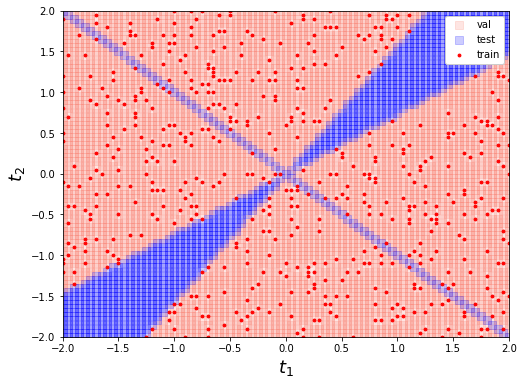

In [14]:
fig_params={"figsize": (8,6)} 
val_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "salmon", "label": "val"}
test_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "blue", "label": "test"}
train_params={"marker": "o", "s": 8, "color": "red", "label": "train"}
legend_params={"framealpha": 1}
xlabel_params={"xlabel": "$t_1$", "fontsize": 18}
ylabel_params={"ylabel": "$t_2$", "fontsize": 18}
title_params={}
savefig_params = {}
simulation.visualize_scatter_2d(fig_params = fig_params, val_params = val_params, test_params = test_params,\
                                train_params = train_params, legend_params = legend_params, \
                                xlabel_params = xlabel_params, ylabel_params = ylabel_params, title_params = title_params,\
                               savefig_params = savefig_params)

# Analyzing simulation data

In [15]:
%load_ext autoreload
%autoreload 2
from data_analysis import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Testing Experiment class

In [16]:
#simulation_dir = "./simulation/fig1b-6561-100"
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_periodic_6561_90"
experiment_name = "0"
experiment = Experiment(simulation_dir, experiment_name)

/home/rio/anaconda3/envs/phase_transitions/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


#### Viewing Train/Val/Test split

In [17]:
experiment.print_train_val_test()

% train:  0.08306660570035056
% val:  0.747599451303155
% test:  0.16933394299649443
% train + val + test:  1.0


number of train hamiltonians:  545
number of val hamiltonians:  4905
number of test hamiltonians:  1111
total number of hamiltonians:  6561


#### Viewing dataset summary

In [18]:
experiment.print_phases()

Summary of train + val data

% train/val phases: 
0    0.514495
1    0.485505
Name: phase, dtype: float64


total train/val phases: 
0    2804
1    2646
Name: phase, dtype: int64


Summary of test data

% test phases: 
1    0.583158
0    0.416842
Name: phase, dtype: float64


total test phases: 
1    554
0    396
Name: phase, dtype: int64


Summary of train + val + test data

% phases: 
1    0.5
0    0.5
Name: phase, dtype: float64


total phases: 
1    3200
0    3200
Name: phase, dtype: int64


#### Viewing eigenvector summary

In [19]:
experiment.eigenvector_summary.head()

,id,phase,pred_phase,type_of
0,0,999,1,test
1,0,999,1,test
2,0,999,0,test
3,0,999,1,test
4,0,999,1,test


#### Viewing Hamiltonian summary

In [20]:
experiment.hamiltonian_summary.head()

,t1,t2,type_of,0,1,phase,pred_phase
id,,,,,,,
0,-2.0,-2.00,test,0.577778,0.422222,999,0
1,-2.0,-1.95,test,0.605556,0.394444,0,0
2,-2.0,-1.90,test,0.744444,0.255556,0,0
3,-2.0,-1.85,test,0.816667,0.183333,0,0
4,-2.0,-1.80,test,0.805556,0.194444,0,0


#### Viewing accuracy

In [21]:
experiment.accuracy

{'eigenvector_train': 0.9895005096839959,
 'eigenvector_val': 0.9730241250424737,
 'eigenvector_test': 0.7994152046783626,
 'hamiltonian_train': 1.0,
 'hamiltonian_val': 1.0,
 'hamiltonian_test': 0.9978947368421053}

#### Visualizing train/val/test splits with scatter plot

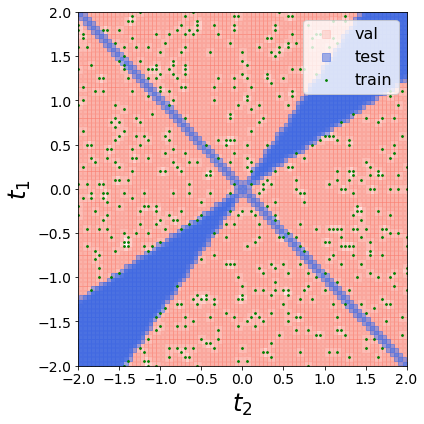

In [22]:
#fig_params={"figsize": (8,6)} 
fig_params = fig_params={"figsize": (6,6)} 
#val_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "salmon", "label": "val"}
#test_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "blue", "label": "test"}
#train_params={"marker": "o", "s": 10, "color": "red", "label": "train"}
val_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "salmon", "label": "val"}
test_params={"marker": "s", "s": 64, "alpha": 0.5, "color": "royalblue", "label": "test"}
train_params={"marker": "o", "s": 3, "alpha": 1, "color": "green", "label": "train"}
legend_params={"framealpha": 0.8, "loc": "upper right", "fontsize": 16}
xlabel_params={"xlabel": "$t_2$", "fontsize": 24}
ylabel_params={"ylabel": "$t_1$", "fontsize": 24}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 14}
yticks_params = {"fontsize": 14}
tight_params = {}
#savefig_params = {"fname": os.path.join(experiment.simulation_dir, "fig1a-6561_train_val_test_0.png")}
path_to_save = "/home/rio/1901.01963/first_neighbours_periodic_6561_90_train_val_test_split_experiment_0.png"
savefig_params = {"fname": path_to_save}
experiment.scatter_train_val_test(val_params, test_params, train_params, legend_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params,\
                                 tight_params, savefig_params)

#### Plotting train winding labels with scatter plot

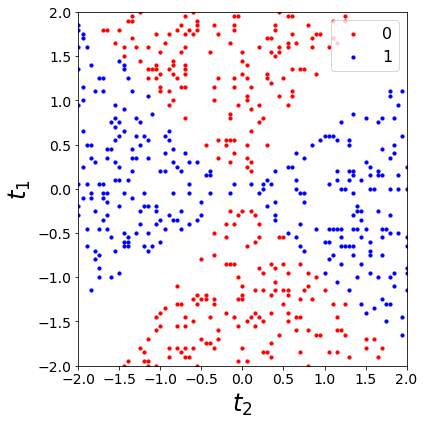

In [23]:
#fig_params={"figsize": (8,6)} 
fig_params = fig_params={"figsize": (6,6)} 
winding_params = {0: {"marker": "o", "s": 10, "color": "red", "label": 0}, \
                  1: {"marker": "o", "s": 10, "color": "blue", "label": 1}, \
                  }
legend_params={"framealpha": 0.8, "loc": "upper right", "fontsize": 16}
xlabel_params={"xlabel": "$t_2$", "fontsize": 24}
ylabel_params={"ylabel": "$t_1$", "fontsize": 24}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 14}
yticks_params = {"fontsize": 14}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_periodic_6561_90_train_winding_labels_experiment_0.png"
savefig_params = {"fname": path_to_save}
experiment.scatter_winding_train(winding_params, legend_params, fig_params, xlabel_params, ylabel_params, \
                                 title_params,  xlim_params, ylim_params, xticks_params, yticks_params, \
                                 tight_params, savefig_params)

#### Plotting prediction grid with pcolormesh

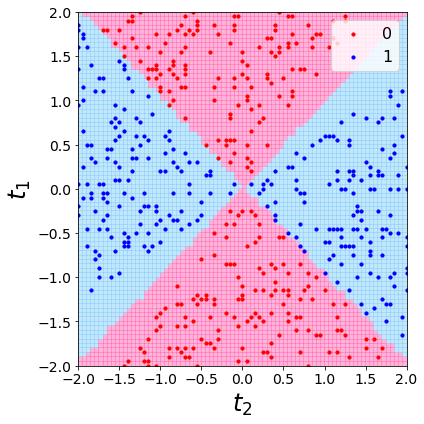

In [24]:
#fig_params, winding_params, contourf_params, legend_params, xlabel_params, ylabel_params, title_params, savefig_params)
#fig_params={"figsize": (8,6)} 
fig_params = fig_params={"figsize": (6,6)}
#winding_params = {-1: {"marker": "o", "s": 10, "color": "red", "label": -1}, 
#                  0: {"marker": "o", "s": 10, "color": "darkorange", "label": 0}, \
#                  1: {"marker": "o", "s": 10, "color": "green", "label": 1}, \
#                  2: {"marker": "o", "s": 10, "color": "blue", "label": 2}}
winding_params = {0: {"marker": "o", "s": 10, "color": "red", "label": 0}, 
                  1: {"marker": "o", "s": 10, "color": "blue", "label": 1}}

#pcolormesh_params = {"cmap": ListedColormap(["hotpink", "orange", "lightgreen","lightskyblue"]), "alpha": 0.5}
pcolormesh_params = {"cmap": ListedColormap(["hotpink", "lightskyblue"]), "alpha": 0.5}
legend_params={"framealpha": 0.8, "loc": "upper right", "fontsize": 16}
xlabel_params={"xlabel": "$t_2$", "fontsize": 24}
ylabel_params={"ylabel": "$t_1$", "fontsize": 24}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 14}
yticks_params = {"fontsize": 14}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_periodic_6561_90_prediction_grid_experiment_0.png"
savefig_params = {"fname": os.path.join(experiment.simulation_dir, path_to_save)}
experiment.pcolormesh_prediction_grid(winding_params, pcolormesh_params, legend_params, fig_params, xlabel_params, \
                                ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                                      tight_params,  savefig_params)

#### Plotting Winding Heatmaps

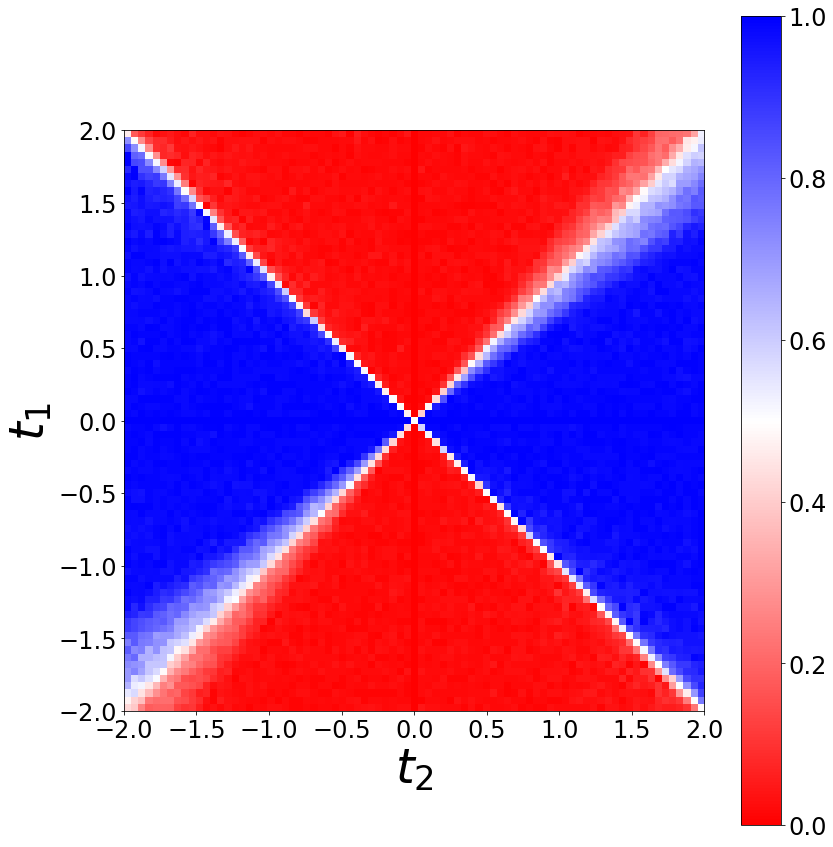

In [25]:
winding = 1
imshow_params = {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2],\
                "vmin": 0, "vmax":1}
colorbar_params={"mappable": None, "labelsize": 24}
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = False
savefig_params = {"fname": path_to_save}
savefig_params = {}
experiment.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                               tight_params, savefig_params)

## Testing ExperimentEnsemble Class

In [26]:
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_periodic_6561_90"
n_experiments = None
load_hamiltonian_summary = False
simulation = ExperimentEnsemble(simulation_dir, n_experiments, load_hamiltonian_summary)

#### Computing Hamiltonian summary

In [27]:
simulation.compute_hamiltonian_summary()

majority vote: 100%|██████████| 6561/6561 [00:00<00:00, 111134.65it/s]


#### Plotting simulation winding heatmaps

Skipping winding 0
Plotting winding 1


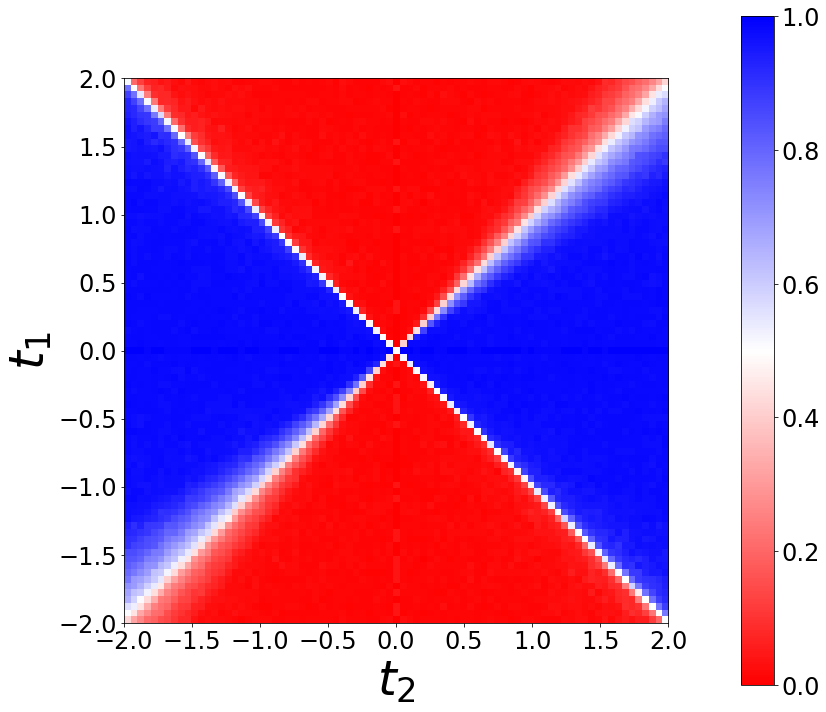

In [28]:
winding_params = {1: {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2], \
                  "vmin": 0, "vmax": 1}}
#colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", "pad": 0.1, "shrink": 0.8}
colorbar_params={1: {"mappable": None, "labelsize": 24, "ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0], "pad": 0.1, "shrink": 0.8, \
                     "extend": "neither"}}
#"ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0]
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(simulation.t2), "right": np.max(simulation.t2)}
ylim_params = {"bottom": np.min(simulation.t1), "top": np.max(simulation.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_periodic_6561_90_simulation_merged_winding_grid.png"
savefig_params = {"fname": path_to_save}
simulation.merge_imshow_winding_grids(winding_params, colorbar_params, fig_params, xlabel_params, ylabel_params, \
                                      title_params, xlim_params, ylim_params, xticks_params, yticks_params,  \
                                      tight_params, savefig_params)

#### Computing mean accuracies

In [29]:
save_to_disk = True
simulation.compute_mean_accuracy(save_to_disk=save_to_disk)
simulation.mean_accuracy

computing mean accuracies: 100%|██████████| 100/100 [00:24<00:00,  4.12it/s]


{'eigenvector_train': 0.9898342507645259,
 'eigenvector_val': 0.9727712764752521,
 'eigenvector_test': 0.8113784795321638,
 'hamiltonian_train': 1.0,
 'hamiltonian_val': 0.9999959225280327,
 'hamiltonian_test': 0.9857157894736842}

#### Computing bootstrap accuracies

In [30]:
save_to_disk = True
simulation.compute_bootstrap_accuracy(save_to_disk=save_to_disk)
simulation.bootstrap_accuracy

{'hamiltonian_train': 1.0, 'hamiltonian_val': 1.0, 'hamiltonian_test': 1.0}

#### Computing mean feature importances

In [31]:
import operator
save_to_disk = False
simulation.compute_mean_feature_importance(save_to_disk=save_to_disk)
### Sorted feature importances from highest to lowest
sorted_feature_importances = sorted(simulation.feature_importance.items(), key=operator.itemgetter(1),reverse=True)
print("Sorted feature importances: ", sorted_feature_importances)

mean feature importances: 100%|██████████| 100/100 [00:00<00:00, 1876.39it/s]

Sorted feature importances:  [(0, 0.13439275816070206), (91, 0.12896140718524404), (90, 0.12433430380630625), (1, 0.12293377436863631), (93, 0.11341530732557689), (3, 0.1053580428638476), (89, 0.024899328350861324), (179, 0.019058912090390297), (5, 0.009365603321374604), (2, 0.007623385382538973), (7, 0.006494035071490023), (97, 0.006392790617298816), (95, 0.0060257578578037044), (92, 0.005845587161574561), (88, 0.005540709621579437), (178, 0.005288521068100967), (175, 0.005054061858190322), (85, 0.004634731765160906), (94, 0.0036150007490760657), (4, 0.003408691773789505), (11, 0.0029388066379253163), (33, 0.002840611407999191), (86, 0.0026537302445883764), (101, 0.002281423099555622), (176, 0.002249905748653569), (137, 0.0021811456979696654), (61, 0.0021170724880911576), (103, 0.0020832741227211093), (13, 0.0020739125988779557), (177, 0.0020497751829680845), (47, 0.0019383195446139741), (151, 0.0019046802316181985), (9, 0.001889194536155391), (123, 0.0018228416997047771), (171, 0.001

#### Plotting feature importances

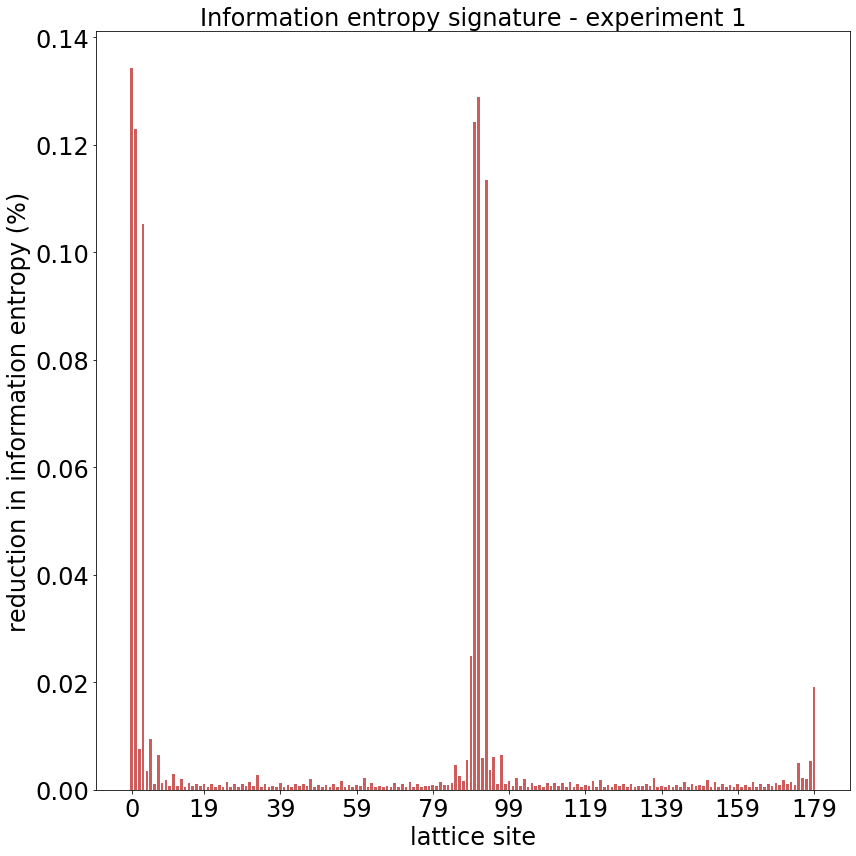

In [35]:
#plot_feature_importances(self, n_features=None, fig_params={}, xlabel_params={}, ylabel_params={}, title_params={})
n_features = None
plot_type = "bar"
plot_params = {"color": "indianred", "width": 0.7}
#plot_params=None
#hist_params = {"color": "tomato", "width": 0.7}
#hist_params = None
hist_precision = 1000
fig_params={"figsize": (12,12)} 
xlabel_params = {"xlabel": "lattice site", "fontsize": 24}
ylabel_params = {"ylabel": "reduction in information entropy (%)", "fontsize": 24}
title_params = {"label": "Information entropy signature - experiment 1", "fontsize": 24}
#title_params = {"label": "Lattice site importances", "fontsize": 20}
#xlim_params = {"left": 0, "right": len(simulation.feature_importance)}
#ylim_params = {"bottom": 0, "top": 0.2}
#xlim_params = {"left": 0, "right": 99}
xlim_params = {}
ylim_params = {}
xticks_params = {"ticks": np.linspace(0,179,10).astype(int), "fontsize": 24}
#xticks_params = {}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_periodic_6561_90_feature_importances.png"
savefig_params = {"fname": path_to_save}
simulation.plot_feature_importances(n_features, plot_type,  hist_precision, plot_params, fig_params,\
                                    xlabel_params, ylabel_params, title_params, xlim_params, \
                                    ylim_params, xticks_params, yticks_params, tight_params, savefig_params)

#### Plotting cumulative feature importances

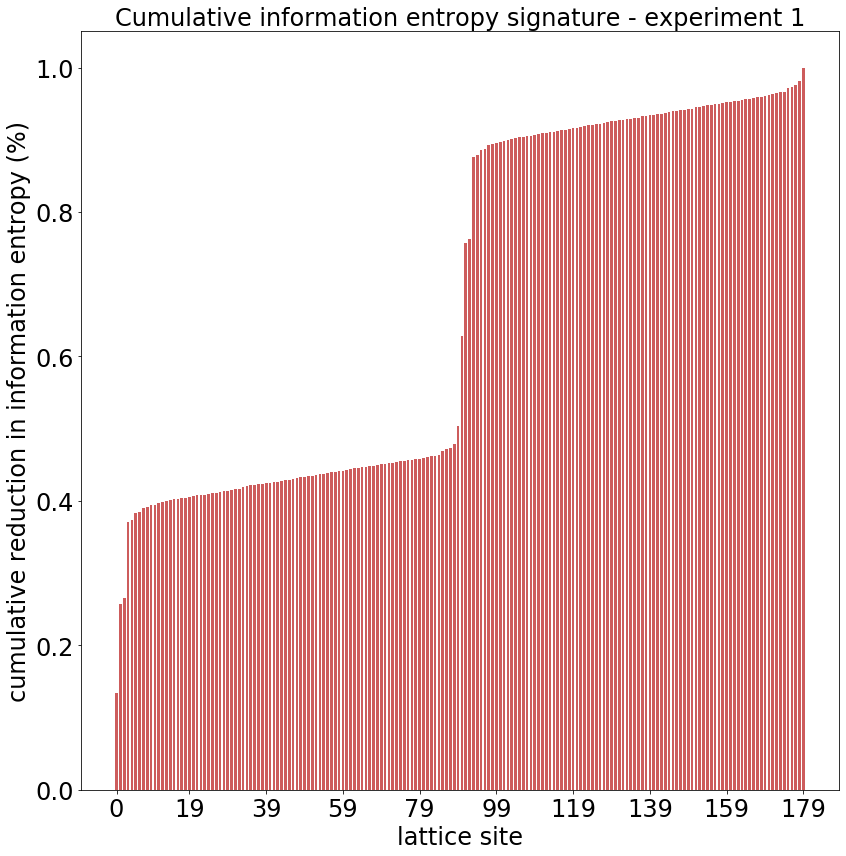

In [34]:
n_features = None
plot_type = "bar"
hist_precision = 1000
plot_params = {"color":"indianred", "width": 0.7}
fig_params={"figsize": (12,12)}
xlabel_params = {"xlabel": "lattice site", "fontsize": 24}
ylabel_params = {"ylabel": "cumulative reduction in information entropy (%)", "fontsize": 24}
title_params = {"label": "Cumulative information entropy signature - experiment 1", "fontsize": 24}
#title_params = {"label": "Lattice site importances", "fontsize": 20}
#xlim_params = {"left": 0, "right": len(simulation.feature_importance)}
#ylim_params = {"bottom": 0, "top": 0.2}
#xlim_params = {"left": 0, "right": 99}
#xlim_params = {"left":-1, "right":100}
xlim_params = {}
ylim_params = {}
#xticks_params = {"ticks": np.array(list(simulation.cumulative_feature_importance.keys()))[np.linspace(0,99,16).astype(int)] }
xticks_params = {"ticks": np.linspace(0,179,10).astype(int), "fontsize": 24}
yticks_params = {"fontsize": 24}
path_to_save = "/home/rio/1901.01963/first_neighbours_periodic_6561_90_cumulative_feature_importances.png"
savefig_params = {"fname": path_to_save}
simulation.plot_cumulative_feature_importances(n_features, plot_type,  hist_precision, plot_params, fig_params,\
                                    xlabel_params, ylabel_params, title_params, xlim_params, \
                                    ylim_params, xticks_params, yticks_params, tight_params, savefig_params)


# Running simulation with most relevant features 0,91

We now rerun the simulations using the most relevant features only

In [36]:
%%time
%load_ext autoreload
%autoreload 2
from simulation import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
CPU times: user 267 µs, sys: 4 µs, total: 271 µs
Wall time: 224 µs


In [45]:
%%time
### YOU MAY NEED TO CHANGE THE CSV FILENAME!
csv_path =  "/home/rio/data/phase_transitions/csv/first_neighbours_periodic_6561_90.csv"             
model = DecisionTreeClassifier(criterion="entropy")
########## YOU MAY NEED TO CHANGE THE ALLOWED WINDINGS!
allowed_windings = [0,1]
########## YOU MAY NEED TO CHANGE THE SIMULATION DIR!
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_periodic_6561_90_feat_0_91"
########## YOU MAY NEED TO CHANGE VALIDATION SPLIT!
val_split = 0.9  
########## YOU MAY NEED TO CHANGE WHICH FEATURES TO USE
features_to_use = [0,91]
#features_to_use = [0,50]
########## YOU MAY NEED TO SHUFFLE FEATURES
shuffle_features = False
########## YOU MAY NEED TO CHANGE THE SEED!
random_state = 137                    
########## YOU MAY NEED TO CHANGE THE SIMULATION PATH!
dict_args = {"csv_path": csv_path, "model": model, "allowed_windings": allowed_windings,\
             "simulation_dir": simulation_dir, "val_split": val_split, "features_to_use": features_to_use,\
             "shuffle_features": shuffle_features, "random_state": random_state}

#Starting an instance of Simulation with a decision tree
simulation = Simulation(**dict_args)
#

print("Info on all data: \n")
simulation.dataframe.info()
simulation.dataframe.head()

Info on all data: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1180980 entries, 0 to 1180979
Columns: 188 entries, id to feat179
dtypes: float64(183), int32(3), object(2)
memory usage: 1.6+ GB
CPU times: user 21.7 s, sys: 1.14 s, total: 22.8 s
Wall time: 21.7 s


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat170,feat171,feat172,feat173,feat174,feat175,feat176,feat177,feat178,feat179
0,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.074536,0.074536,...,0.074536,0.074536,0.074536,0.074536,0.074536,0.074536,0.074536,0.074536,0.074536,0.074536
1,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.105409,0.105345,...,0.099052,0.097734,0.101326,0.100250,0.103106,0.102278,0.104383,0.103808,0.105152,0.104832
2,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.105409,0.105152,...,0.080748,0.075825,0.089392,0.085278,0.096296,0.093071,0.101326,0.099052,0.104383,0.103106
3,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,-0.074536,0.074536,...,-0.074536,0.074536,-0.074536,0.074536,-0.074536,0.074536,-0.074536,0.074536,-0.074536,0.074536
4,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.000030,-0.003649,...,-0.036024,-0.039459,-0.029026,-0.032545,-0.021886,-0.025472,-0.014640,-0.018274,-0.007323,-0.010988


### Running simulation

In [46]:
#running a simulation
n_experiments = 100
start_n = 0
fit_params = None
shuffle_rows = True
pred_params = None
random_features = False
######### DON'T SET THIS TO TRUE UNLESS YOUR DATASET IS SMALL!! WILL FLOOD YOUR MEMORY!!!
store_in_lists = False  
########## BELOW ARE THE PARAMETERS THAT CONTROL WHAT WILL BE SAVED
save_eigenvector=True
save_hamiltonian=True 
save_accuracy=True 
save_model=True
########## RUNNING SIMULATION
simulation.run_simulation(n_experiments, start_n, fit_params, shuffle_rows, pred_params, random_features,\
                          store_in_lists, save_eigenvector, save_hamiltonian, save_accuracy, save_model)

simulation.dataframe.head(10)

running experiments: 100%|██████████| 100/100 [07:41<00:00,  4.48s/it]


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat170,feat171,feat172,feat173,feat174,feat175,feat176,feat177,feat178,feat179
0,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,0.074536,0.074536,...,0.074536,0.074536,0.074536,0.074536,0.074536,0.074536,0.074536,0.074536,0.074536,0.074536
1,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,0.105409,0.105345,...,0.099052,0.097734,0.101326,0.100250,0.103106,0.102278,0.104383,0.103808,0.105152,0.104832
2,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,0.105409,0.105152,...,0.080748,0.075825,0.089392,0.085278,0.096296,0.093071,0.101326,0.099052,0.104383,0.103106
3,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,-0.074536,0.074536,...,-0.074536,0.074536,-0.074536,0.074536,-0.074536,0.074536,-0.074536,0.074536,-0.074536,0.074536
4,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,0.000030,-0.003649,...,-0.036024,-0.039459,-0.029026,-0.032545,-0.021886,-0.025472,-0.014640,-0.018274,-0.007323,-0.010988
5,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,-0.000365,0.006989,...,0.067476,0.072960,0.055548,0.061662,0.042540,0.049164,0.028703,0.035709,0.014308,0.021558
6,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,-0.105377,-0.104528,...,-0.050435,-0.040484,-0.068577,-0.059834,-0.083723,-0.076569,-0.095209,-0.089958,-0.102533,-0.099416
7,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,-0.002187,-0.013191,...,-0.092361,-0.097165,-0.079781,-0.086545,-0.063714,-0.072143,-0.044863,-0.054587,-0.024050,-0.034646
8,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,0.105391,0.104094,...,0.016379,0.001727,0.044446,0.030711,0.069070,0.057316,0.088342,0.079480,0.100770,0.095486
9,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,0.000845,0.015506,...,0.103951,0.105371,0.095109,0.100508,0.078897,0.087858,0.056573,0.068401,0.029866,0.043644


#### Loading simulation

In [47]:
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_periodic_6561_90_feat_0_91"
n_experiments = None
load_hamiltonian_summary = False
simulation = ExperimentEnsemble(simulation_dir, n_experiments, load_hamiltonian_summary)

/home/rio/anaconda3/envs/phase_transitions/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


#### Computing Hamiltonian summary

In [48]:
simulation.n_experiments

100

In [49]:
simulation.compute_hamiltonian_summary()

majority vote: 100%|██████████| 6561/6561 [00:00<00:00, 124990.70it/s]


#### Computing mean accuracies with less features

In [50]:
simulation.n_experiments

100

In [51]:
save_to_disk = True
simulation.compute_mean_accuracy(save_to_disk)
simulation.mean_accuracy

computing mean accuracies: 100%|██████████| 100/100 [00:27<00:00,  3.84it/s]


{'eigenvector_train': 0.9661986748216106,
 'eigenvector_val': 0.6862988107373428,
 'eigenvector_test': 0.5981621637426902,
 'hamiltonian_train': 0.9888073394495415,
 'hamiltonian_val': 0.9379898063200816,
 'hamiltonian_test': 0.7498947368421053}

#### Plotting heatmap for less features

Skipping winding 0
Plotting winding 1


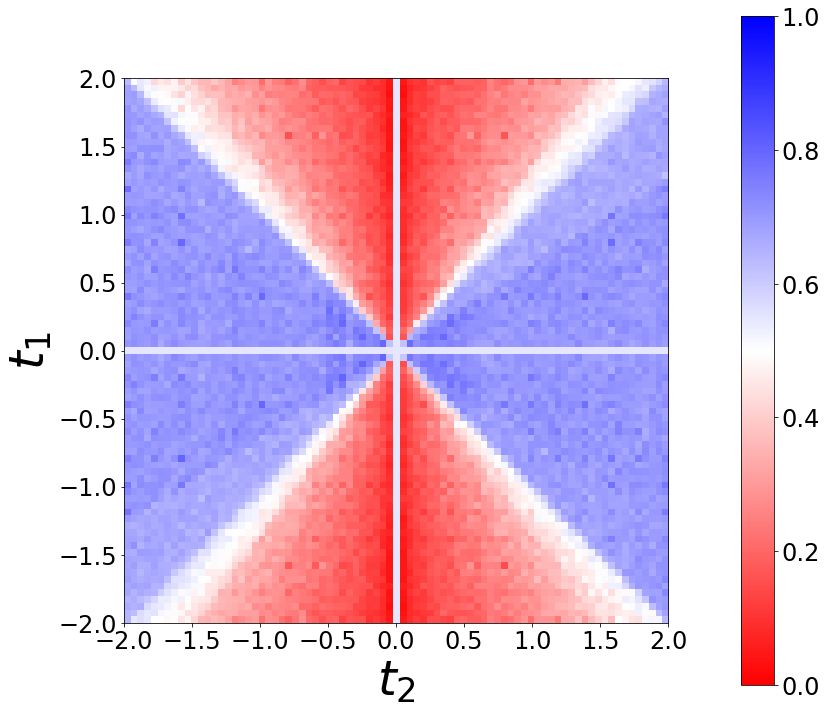

In [52]:
winding_params = {1: {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2], \
                  "vmin": 0, "vmax": 1}}
#colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", "pad": 0.1, "shrink": 0.8}
colorbar_params={1: {"mappable": None, "labelsize": 24, "ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0], "pad": 0.1, "shrink": 0.8, \
                     "extend": "neither"}}
#"ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0]
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(simulation.t2), "right": np.max(simulation.t2)}
ylim_params = {"bottom": np.min(simulation.t1), "top": np.max(simulation.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_periodic_6561_90_feat_0_91_simulation_merged_winding_grid.png"
savefig_params = {"fname": path_to_save}
simulation.merge_imshow_winding_grids(winding_params, colorbar_params, fig_params, xlabel_params, ylabel_params, \
                                      title_params, xlim_params, ylim_params, xticks_params, yticks_params,  \
                                      tight_params, savefig_params)

# Running simulation with most relevant features 0,90

In [57]:
%%time
### YOU MAY NEED TO CHANGE THE CSV FILENAME!
csv_path =  "/home/rio/data/phase_transitions/csv/first_neighbours_periodic_6561_90.csv"             
model = DecisionTreeClassifier(criterion="entropy")
########## YOU MAY NEED TO CHANGE THE ALLOWED WINDINGS!
allowed_windings = [0,1]
########## YOU MAY NEED TO CHANGE THE SIMULATION DIR!
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_periodic_6561_90_feat_0_90"
########## YOU MAY NEED TO CHANGE VALIDATION SPLIT!
val_split = 0.9  
########## YOU MAY NEED TO CHANGE WHICH FEATURES TO USE
features_to_use = [0,90]
#features_to_use = [0,50]
########## YOU MAY NEED TO SHUFFLE FEATURES
shuffle_features = False
########## YOU MAY NEED TO CHANGE THE SEED!
random_state = 137                    
########## YOU MAY NEED TO CHANGE THE SIMULATION PATH!
dict_args = {"csv_path": csv_path, "model": model, "allowed_windings": allowed_windings,\
             "simulation_dir": simulation_dir, "val_split": val_split, "features_to_use": features_to_use,\
             "shuffle_features": shuffle_features, "random_state": random_state}

#Starting an instance of Simulation with a decision tree
simulation = Simulation(**dict_args)
#

print("Info on all data: \n")
simulation.dataframe.info()
simulation.dataframe.head()

/home/rio/anaconda3/envs/phase_transitions/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Info on all data: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1180980 entries, 0 to 1180979
Columns: 188 entries, id to feat179
dtypes: float64(183), int32(3), object(2)
memory usage: 1.6+ GB
CPU times: user 22.5 s, sys: 1.26 s, total: 23.8 s
Wall time: 22.5 s


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat170,feat171,feat172,feat173,feat174,feat175,feat176,feat177,feat178,feat179
0,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.074536,0.074536,...,0.074536,0.074536,0.074536,0.074536,0.074536,0.074536,0.074536,0.074536,0.074536,0.074536
1,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.105409,0.105345,...,0.099052,0.097734,0.101326,0.100250,0.103106,0.102278,0.104383,0.103808,0.105152,0.104832
2,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.105409,0.105152,...,0.080748,0.075825,0.089392,0.085278,0.096296,0.093071,0.101326,0.099052,0.104383,0.103106
3,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,-0.074536,0.074536,...,-0.074536,0.074536,-0.074536,0.074536,-0.074536,0.074536,-0.074536,0.074536,-0.074536,0.074536
4,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.000030,-0.003649,...,-0.036024,-0.039459,-0.029026,-0.032545,-0.021886,-0.025472,-0.014640,-0.018274,-0.007323,-0.010988


In [58]:
#running a simulation
n_experiments = 100
start_n = 0
fit_params = None
shuffle_rows = True
pred_params = None
random_features = False
######### DON'T SET THIS TO TRUE UNLESS YOUR DATASET IS SMALL!! WILL FLOOD YOUR MEMORY!!!
store_in_lists = False  
########## BELOW ARE THE PARAMETERS THAT CONTROL WHAT WILL BE SAVED
save_eigenvector=True
save_hamiltonian=True 
save_accuracy=True 
save_model=True
########## RUNNING SIMULATION
simulation.run_simulation(n_experiments, start_n, fit_params, shuffle_rows, pred_params, random_features,\
                          store_in_lists, save_eigenvector, save_hamiltonian, save_accuracy, save_model)

simulation.dataframe.head(10)

running experiments: 100%|██████████| 100/100 [07:24<00:00,  4.43s/it]


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat170,feat171,feat172,feat173,feat174,feat175,feat176,feat177,feat178,feat179
0,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,0.074536,0.074536,...,0.074536,0.074536,0.074536,0.074536,0.074536,0.074536,0.074536,0.074536,0.074536,0.074536
1,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,0.105409,0.105345,...,0.099052,0.097734,0.101326,0.100250,0.103106,0.102278,0.104383,0.103808,0.105152,0.104832
2,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,0.105409,0.105152,...,0.080748,0.075825,0.089392,0.085278,0.096296,0.093071,0.101326,0.099052,0.104383,0.103106
3,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,-0.074536,0.074536,...,-0.074536,0.074536,-0.074536,0.074536,-0.074536,0.074536,-0.074536,0.074536,-0.074536,0.074536
4,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,0.000030,-0.003649,...,-0.036024,-0.039459,-0.029026,-0.032545,-0.021886,-0.025472,-0.014640,-0.018274,-0.007323,-0.010988
5,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,-0.000365,0.006989,...,0.067476,0.072960,0.055548,0.061662,0.042540,0.049164,0.028703,0.035709,0.014308,0.021558
6,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,-0.105377,-0.104528,...,-0.050435,-0.040484,-0.068577,-0.059834,-0.083723,-0.076569,-0.095209,-0.089958,-0.102533,-0.099416
7,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,-0.002187,-0.013191,...,-0.092361,-0.097165,-0.079781,-0.086545,-0.063714,-0.072143,-0.044863,-0.054587,-0.024050,-0.034646
8,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,0.105391,0.104094,...,0.016379,0.001727,0.044446,0.030711,0.069070,0.057316,0.088342,0.079480,0.100770,0.095486
9,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,0.000845,0.015506,...,0.103951,0.105371,0.095109,0.100508,0.078897,0.087858,0.056573,0.068401,0.029866,0.043644


#### Loading simulation

In [59]:
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_periodic_6561_90_feat_0_90"
n_experiments = None
load_hamiltonian_summary = False
simulation = ExperimentEnsemble(simulation_dir, n_experiments, load_hamiltonian_summary)

/home/rio/anaconda3/envs/phase_transitions/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


#### Computing Hamiltonian summary

In [60]:
simulation.compute_hamiltonian_summary()

majority vote: 100%|██████████| 6561/6561 [00:00<00:00, 131802.10it/s]


#### Computing mean accuracies with less features

In [62]:
save_to_disk = True
simulation.compute_mean_accuracy(save_to_disk)
simulation.mean_accuracy

computing mean accuracies: 100%|██████████| 100/100 [00:26<00:00,  3.97it/s]


{'eigenvector_train': 0.6997120285423039,
 'eigenvector_val': 0.5761355646166044,
 'eigenvector_test': 0.5343331578947368,
 'hamiltonian_train': 0.8931009174311926,
 'hamiltonian_val': 0.5950662589194698,
 'hamiltonian_test': 0.49612631578947375}

#### Plotting heatmap for less features 0,90

Skipping winding 0
Plotting winding 1


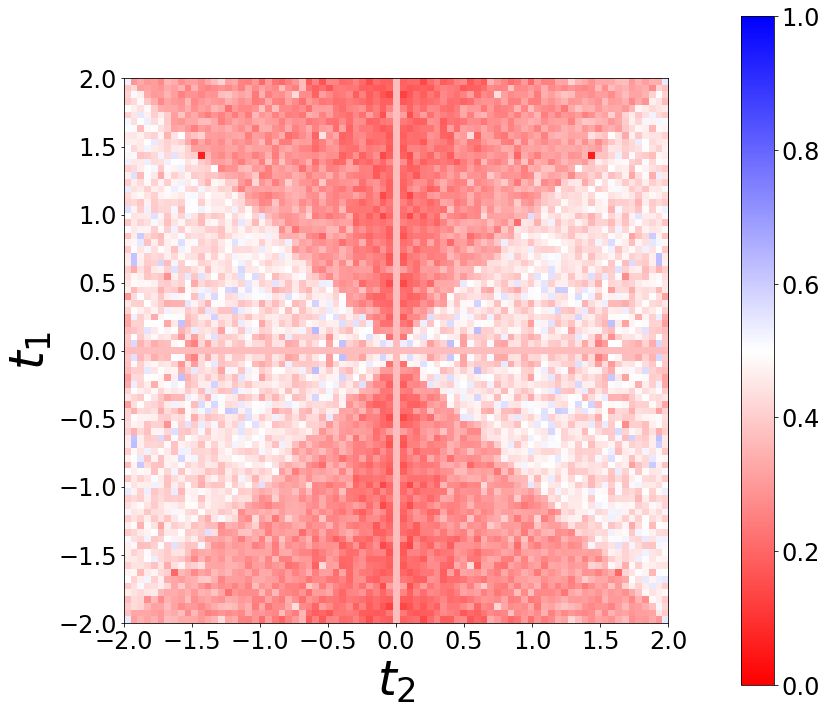

In [63]:
winding_params = {1: {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2], \
                  "vmin": 0, "vmax": 1}}
#colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", "pad": 0.1, "shrink": 0.8}
colorbar_params={1: {"mappable": None, "labelsize": 24, "ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0], "pad": 0.1, "shrink": 0.8, \
                     "extend": "neither"}}
#"ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0]
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(simulation.t2), "right": np.max(simulation.t2)}
ylim_params = {"bottom": np.min(simulation.t1), "top": np.max(simulation.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_periodic_6561_90_feat_0_90_simulation_merged_winding_grid.png"
savefig_params = {"fname": path_to_save}
simulation.merge_imshow_winding_grids(winding_params, colorbar_params, fig_params, xlabel_params, ylabel_params, \
                                      title_params, xlim_params, ylim_params, xticks_params, yticks_params,  \
                                      tight_params, savefig_params)

# Running simulation with random features

In [64]:
%%time
### YOU MAY NEED TO CHANGE THE CSV FILENAME!
csv_path = "/home/rio/data/phase_transitions/csv/first_neighbours_periodic_6561_90.csv"                   
model = DecisionTreeClassifier(criterion="entropy")
########## YOU MAY NEED TO CHANGE THE ALLOWED WINDINGS!
allowed_windings = [0,1]
########## YOU MAY NEED TO CHANGE THE SIMULATION DIR!
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_periodic_6561_90_random_feat"
########## YOU MAY NEED TO CHANGE VALIDATION SPLIT!
val_split = 0.9  
########## YOU MAY NEED TO CHANGE WHICH FEATURES TO USE
features_to_use = None
########## YOU MAY NEED TO SHUFFLE FEATURES
shuffle_features = False
########## YOU MAY NEED TO CHANGE THE SEED!
random_state = 137                    
########## YOU MAY NEED TO CHANGE THE SIMULATION PATH!
dict_args = {"csv_path": csv_path, "model": model, "allowed_windings": allowed_windings,\
             "simulation_dir": simulation_dir, "val_split": val_split, "features_to_use": features_to_use,\
             "shuffle_features": shuffle_features, "random_state": random_state}

#Starting an instance of Simulation with a decision tree
simulation = Simulation(**dict_args)
#

print("Info on all data: \n")
simulation.dataframe.info()
simulation.dataframe.head()

Info on all data: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1180980 entries, 0 to 1180979
Columns: 188 entries, id to feat179
dtypes: float64(183), int32(3), object(2)
memory usage: 1.6+ GB
CPU times: user 22.4 s, sys: 1.02 s, total: 23.4 s
Wall time: 22.4 s


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat170,feat171,feat172,feat173,feat174,feat175,feat176,feat177,feat178,feat179
0,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.074536,0.074536,...,0.074536,0.074536,0.074536,0.074536,0.074536,0.074536,0.074536,0.074536,0.074536,0.074536
1,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.105409,0.105345,...,0.099052,0.097734,0.101326,0.100250,0.103106,0.102278,0.104383,0.103808,0.105152,0.104832
2,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.105409,0.105152,...,0.080748,0.075825,0.089392,0.085278,0.096296,0.093071,0.101326,0.099052,0.104383,0.103106
3,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,-0.074536,0.074536,...,-0.074536,0.074536,-0.074536,0.074536,-0.074536,0.074536,-0.074536,0.074536,-0.074536,0.074536
4,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.000030,-0.003649,...,-0.036024,-0.039459,-0.029026,-0.032545,-0.021886,-0.025472,-0.014640,-0.018274,-0.007323,-0.010988


#### Running simulation

In [65]:
#running a simulation
n_experiments = 100
start_n = 0
fit_params = None
shuffle_rows = True
pred_params = None
random_features = 2
######### DON'T SET THIS TO TRUE UNLESS YOUR DATASET IS SMALL!! WILL FLOOD YOUR MEMORY!!!
store_in_lists = False  
########## BELOW ARE THE PARAMETERS THAT CONTROL WHAT WILL BE SAVED
save_eigenvector=True
save_hamiltonian=True 
save_accuracy=True 
save_model=True
########## RUNNING SIMULATION
simulation.run_simulation(n_experiments, start_n, fit_params, shuffle_rows, pred_params, random_features, \
                          store_in_lists, save_eigenvector, save_hamiltonian, save_accuracy, save_model)

simulation.dataframe.head(10)

running experiments:   0%|          | 0/100 [00:00<?, ?it/s]

random_features:  [38 77]


running experiments:   1%|          | 1/100 [00:05<09:08,  5.54s/it]

random_features:  [68 50]


running experiments:   2%|▏         | 2/100 [00:10<08:51,  5.42s/it]

random_features:  [ 17 126]


running experiments:   3%|▎         | 3/100 [00:15<08:26,  5.22s/it]

random_features:  [108  82]


running experiments:   4%|▍         | 4/100 [00:20<08:19,  5.20s/it]

random_features:  [138 140]


running experiments:   5%|▌         | 5/100 [00:25<08:06,  5.12s/it]

random_features:  [52 46]


running experiments:   6%|▌         | 6/100 [00:31<08:37,  5.51s/it]

random_features:  [143 131]


running experiments:   7%|▋         | 7/100 [00:37<08:22,  5.40s/it]

random_features:  [  6 163]


running experiments:   8%|▊         | 8/100 [00:42<08:09,  5.32s/it]

random_features:  [171 155]


running experiments:   9%|▉         | 9/100 [00:46<07:45,  5.11s/it]

random_features:  [160 175]


running experiments:  10%|█         | 10/100 [00:51<07:29,  5.00s/it]

random_features:  [23 86]


running experiments:  11%|█         | 11/100 [00:56<07:16,  4.90s/it]

random_features:  [ 69 115]


running experiments:  12%|█▏        | 12/100 [01:00<07:05,  4.83s/it]

random_features:  [ 78 178]


running experiments:  13%|█▎        | 13/100 [01:05<07:04,  4.87s/it]

random_features:  [ 60 110]


running experiments:  14%|█▍        | 14/100 [01:10<06:53,  4.81s/it]

random_features:  [66 63]


running experiments:  15%|█▌        | 15/100 [01:15<06:41,  4.72s/it]

random_features:  [141 118]


running experiments:  16%|█▌        | 16/100 [01:19<06:34,  4.69s/it]

random_features:  [146 140]


running experiments:  17%|█▋        | 17/100 [01:24<06:35,  4.77s/it]

random_features:  [47 30]


running experiments:  18%|█▊        | 18/100 [01:29<06:32,  4.78s/it]

random_features:  [135 105]


running experiments:  19%|█▉        | 19/100 [01:34<06:29,  4.80s/it]

random_features:  [ 54 105]


running experiments:  20%|██        | 20/100 [01:39<06:22,  4.78s/it]

random_features:  [133  56]


running experiments:  21%|██        | 21/100 [01:43<06:12,  4.72s/it]

random_features:  [66  1]


running experiments:  22%|██▏       | 22/100 [01:48<06:04,  4.67s/it]

random_features:  [ 84 100]


running experiments:  23%|██▎       | 23/100 [01:53<06:08,  4.78s/it]

random_features:  [123 131]


running experiments:  24%|██▍       | 24/100 [01:57<06:00,  4.74s/it]

random_features:  [ 44 150]


running experiments:  25%|██▌       | 25/100 [02:02<05:54,  4.73s/it]

random_features:  [136 105]


running experiments:  26%|██▌       | 26/100 [02:07<05:51,  4.74s/it]

random_features:  [178  52]


running experiments:  27%|██▋       | 27/100 [02:13<06:13,  5.11s/it]

random_features:  [ 97 150]


running experiments:  28%|██▊       | 28/100 [02:18<06:01,  5.02s/it]

random_features:  [ 62 120]


running experiments:  29%|██▉       | 29/100 [02:22<05:50,  4.93s/it]

random_features:  [ 52 107]


running experiments:  30%|███       | 30/100 [02:27<05:47,  4.97s/it]

random_features:  [153   4]


running experiments:  31%|███       | 31/100 [02:32<05:36,  4.88s/it]

random_features:  [145 103]


running experiments:  32%|███▏      | 32/100 [02:37<05:29,  4.85s/it]

random_features:  [107  54]


running experiments:  33%|███▎      | 33/100 [02:42<05:27,  4.89s/it]

random_features:  [70 82]


running experiments:  34%|███▍      | 34/100 [02:47<05:21,  4.87s/it]

random_features:  [ 71 145]


running experiments:  35%|███▌      | 35/100 [02:51<05:13,  4.82s/it]

random_features:  [76  4]


running experiments:  36%|███▌      | 36/100 [02:57<05:19,  4.99s/it]

random_features:  [171 113]


running experiments:  37%|███▋      | 37/100 [03:01<05:09,  4.91s/it]

random_features:  [ 38 101]


running experiments:  38%|███▊      | 38/100 [03:06<04:56,  4.78s/it]

random_features:  [ 29 120]


running experiments:  39%|███▉      | 39/100 [03:11<04:49,  4.75s/it]

random_features:  [128  84]


running experiments:  40%|████      | 40/100 [03:16<04:51,  4.86s/it]

random_features:  [61 61]


running experiments:  41%|████      | 41/100 [03:21<04:47,  4.87s/it]

random_features:  [91 11]


running experiments:  42%|████▏     | 42/100 [03:25<04:41,  4.85s/it]

random_features:  [142  64]


running experiments:  43%|████▎     | 43/100 [03:31<04:43,  4.98s/it]

random_features:  [31 60]


running experiments:  44%|████▍     | 44/100 [03:35<04:32,  4.87s/it]

random_features:  [172  63]


running experiments:  45%|████▌     | 45/100 [03:40<04:22,  4.77s/it]

random_features:  [132 120]


running experiments:  46%|████▌     | 46/100 [03:44<04:14,  4.71s/it]

random_features:  [ 25 149]


running experiments:  47%|████▋     | 47/100 [03:49<04:08,  4.69s/it]

random_features:  [107 166]


running experiments:  48%|████▊     | 48/100 [03:54<04:02,  4.66s/it]

random_features:  [ 1 53]


running experiments:  49%|████▉     | 49/100 [03:58<03:55,  4.62s/it]

random_features:  [ 60 172]


running experiments:  50%|█████     | 50/100 [04:03<03:51,  4.63s/it]

random_features:  [ 74 115]


running experiments:  51%|█████     | 51/100 [04:07<03:45,  4.60s/it]

random_features:  [118  21]


running experiments:  52%|█████▏    | 52/100 [04:12<03:42,  4.63s/it]

random_features:  [73 88]


running experiments:  53%|█████▎    | 53/100 [04:17<03:37,  4.62s/it]

random_features:  [59 99]


running experiments:  54%|█████▍    | 54/100 [04:22<03:34,  4.67s/it]

random_features:  [127  55]


running experiments:  55%|█████▌    | 55/100 [04:26<03:30,  4.69s/it]

random_features:  [27 57]


running experiments:  56%|█████▌    | 56/100 [04:31<03:31,  4.80s/it]

random_features:  [174   0]


running experiments:  57%|█████▋    | 57/100 [04:36<03:23,  4.73s/it]

random_features:  [ 47 170]


running experiments:  58%|█████▊    | 58/100 [04:41<03:22,  4.83s/it]

random_features:  [92 58]


running experiments:  59%|█████▉    | 59/100 [04:47<03:30,  5.14s/it]

random_features:  [114 164]


running experiments:  60%|██████    | 60/100 [04:52<03:24,  5.11s/it]

random_features:  [ 41 125]


running experiments:  61%|██████    | 61/100 [04:57<03:17,  5.07s/it]

random_features:  [21 86]


running experiments:  62%|██████▏   | 62/100 [05:01<03:06,  4.90s/it]

random_features:  [133  36]


running experiments:  63%|██████▎   | 63/100 [05:06<02:59,  4.84s/it]

random_features:  [ 14 113]


running experiments:  64%|██████▍   | 64/100 [05:10<02:49,  4.72s/it]

random_features:  [136 151]


running experiments:  65%|██████▌   | 65/100 [05:15<02:44,  4.69s/it]

random_features:  [78 36]


running experiments:  66%|██████▌   | 66/100 [05:20<02:41,  4.74s/it]

random_features:  [100 155]


running experiments:  67%|██████▋   | 67/100 [05:25<02:36,  4.73s/it]

random_features:  [127 147]


running experiments:  68%|██████▊   | 68/100 [05:30<02:33,  4.79s/it]

random_features:  [45 65]


running experiments:  69%|██████▉   | 69/100 [05:34<02:28,  4.79s/it]

random_features:  [37 98]


running experiments:  70%|███████   | 70/100 [05:39<02:21,  4.73s/it]

random_features:  [161  17]


running experiments:  71%|███████   | 71/100 [05:44<02:21,  4.89s/it]

random_features:  [128  42]


running experiments:  72%|███████▏  | 72/100 [05:49<02:19,  4.97s/it]

random_features:  [122  91]


running experiments:  73%|███████▎  | 73/100 [05:54<02:10,  4.84s/it]

random_features:  [122 173]


running experiments:  74%|███████▍  | 74/100 [05:59<02:04,  4.78s/it]

random_features:  [176  78]


running experiments:  75%|███████▌  | 75/100 [06:04<02:02,  4.91s/it]

random_features:  [143  80]


running experiments:  76%|███████▌  | 76/100 [06:08<01:55,  4.83s/it]

random_features:  [ 15 113]


running experiments:  77%|███████▋  | 77/100 [06:13<01:49,  4.74s/it]

random_features:  [102  13]


running experiments:  78%|███████▊  | 78/100 [06:17<01:43,  4.69s/it]

random_features:  [114  24]


running experiments:  79%|███████▉  | 79/100 [06:23<01:40,  4.81s/it]

random_features:  [143  91]


running experiments:  80%|████████  | 80/100 [06:27<01:34,  4.72s/it]

random_features:  [126  64]


running experiments:  81%|████████  | 81/100 [06:32<01:29,  4.73s/it]

random_features:  [177  93]


running experiments:  82%|████████▏ | 82/100 [06:37<01:26,  4.78s/it]

random_features:  [  3 167]


running experiments:  83%|████████▎ | 83/100 [06:42<01:22,  4.87s/it]

random_features:  [99 70]


running experiments:  84%|████████▍ | 84/100 [06:47<01:19,  4.97s/it]

random_features:  [  1 158]


running experiments:  85%|████████▌ | 85/100 [06:52<01:13,  4.90s/it]

random_features:  [54 46]


running experiments:  86%|████████▌ | 86/100 [06:57<01:08,  4.90s/it]

random_features:  [ 69 102]


running experiments:  87%|████████▋ | 87/100 [07:01<01:03,  4.87s/it]

random_features:  [154  64]


running experiments:  88%|████████▊ | 88/100 [07:07<01:00,  5.01s/it]

random_features:  [ 95 133]


running experiments:  89%|████████▉ | 89/100 [07:11<00:53,  4.89s/it]

random_features:  [110  54]


running experiments:  90%|█████████ | 90/100 [07:16<00:48,  4.84s/it]

random_features:  [ 25 107]


running experiments:  91%|█████████ | 91/100 [07:21<00:42,  4.75s/it]

random_features:  [23 39]


running experiments:  92%|█████████▏| 92/100 [07:25<00:37,  4.68s/it]

random_features:  [ 89 124]


running experiments:  93%|█████████▎| 93/100 [07:30<00:32,  4.65s/it]

random_features:  [149  85]


running experiments:  94%|█████████▍| 94/100 [07:34<00:27,  4.65s/it]

random_features:  [19 58]


running experiments:  95%|█████████▌| 95/100 [07:39<00:23,  4.61s/it]

random_features:  [140  61]


running experiments:  96%|█████████▌| 96/100 [07:44<00:18,  4.68s/it]

random_features:  [ 82 152]


running experiments:  97%|█████████▋| 97/100 [07:50<00:15,  5.10s/it]

random_features:  [111 168]


running experiments:  98%|█████████▊| 98/100 [07:55<00:10,  5.07s/it]

random_features:  [  6 174]


running experiments:  99%|█████████▉| 99/100 [08:00<00:05,  5.07s/it]

random_features:  [178  55]


running experiments: 100%|██████████| 100/100 [08:05<00:00,  5.02s/it]


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat170,feat171,feat172,feat173,feat174,feat175,feat176,feat177,feat178,feat179
0,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,0.074536,0.074536,...,0.074536,0.074536,0.074536,0.074536,0.074536,0.074536,0.074536,0.074536,0.074536,0.074536
1,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,0.105409,0.105345,...,0.099052,0.097734,0.101326,0.100250,0.103106,0.102278,0.104383,0.103808,0.105152,0.104832
2,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,0.105409,0.105152,...,0.080748,0.075825,0.089392,0.085278,0.096296,0.093071,0.101326,0.099052,0.104383,0.103106
3,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,-0.074536,0.074536,...,-0.074536,0.074536,-0.074536,0.074536,-0.074536,0.074536,-0.074536,0.074536,-0.074536,0.074536
4,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,0.000030,-0.003649,...,-0.036024,-0.039459,-0.029026,-0.032545,-0.021886,-0.025472,-0.014640,-0.018274,-0.007323,-0.010988
5,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,-0.000365,0.006989,...,0.067476,0.072960,0.055548,0.061662,0.042540,0.049164,0.028703,0.035709,0.014308,0.021558
6,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,-0.105377,-0.104528,...,-0.050435,-0.040484,-0.068577,-0.059834,-0.083723,-0.076569,-0.095209,-0.089958,-0.102533,-0.099416
7,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,-0.002187,-0.013191,...,-0.092361,-0.097165,-0.079781,-0.086545,-0.063714,-0.072143,-0.044863,-0.054587,-0.024050,-0.034646
8,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,0.105391,0.104094,...,0.016379,0.001727,0.044446,0.030711,0.069070,0.057316,0.088342,0.079480,0.100770,0.095486
9,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,0.000845,0.015506,...,0.103951,0.105371,0.095109,0.100508,0.078897,0.087858,0.056573,0.068401,0.029866,0.043644


#### Loading simulation with random features

In [66]:
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_periodic_6561_90_random_feat"
n_experiments = None
load_hamiltonian_summary = False
simulation = ExperimentEnsemble(simulation_dir, n_experiments, load_hamiltonian_summary)

/home/rio/anaconda3/envs/phase_transitions/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


#### Computing Hamiltonian summary for simulation with random features

In [67]:
simulation.compute_hamiltonian_summary()

majority vote: 100%|██████████| 6561/6561 [00:00<00:00, 135121.42it/s]


#### Computing mean accuracies for simulation with random features

In [68]:
save_to_disk = True
simulation.compute_mean_accuracy(save_to_disk)
simulation.mean_accuracy

computing mean accuracies: 100%|██████████| 100/100 [00:27<00:00,  3.86it/s]


{'eigenvector_train': 0.9501483180428134,
 'eigenvector_val': 0.6405439800656926,
 'eigenvector_test': 0.563135029239766,
 'hamiltonian_train': 0.9881651376146791,
 'hamiltonian_val': 0.8532782874617737,
 'hamiltonian_test': 0.7087473684210525}

#### Plotting heatmap for simulation with random features

Skipping winding 0
Plotting winding 1


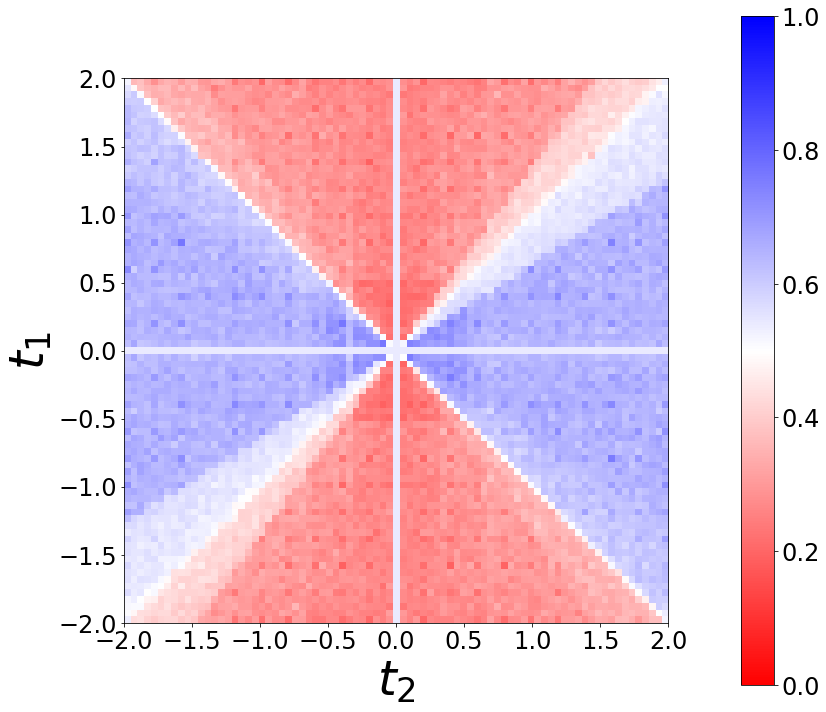

In [69]:
winding_params = {1: {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2], \
                  "vmin": 0, "vmax": 1}}
#colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", "pad": 0.1, "shrink": 0.8}
colorbar_params={1: {"mappable": None, "labelsize": 24, "ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0], "pad": 0.1, "shrink": 0.8, \
                     "extend": "neither"}}
#"ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0]
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(simulation.t2), "right": np.max(simulation.t2)}
ylim_params = {"bottom": np.min(simulation.t1), "top": np.max(simulation.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_periodic_6561_90_random_feat_simulation_merged_winding_grid.png"
savefig_params = {"fname": path_to_save}
simulation.merge_imshow_winding_grids(winding_params, colorbar_params, fig_params, xlabel_params, ylabel_params, \
                                      title_params, xlim_params, ylim_params, xticks_params, yticks_params,  \
                                      tight_params, savefig_params)